In [1]:
import json
import os
import matplotlib.pyplot as plt
from gensim import corpora, models
from nltk.corpus import stopwords
import string

In [2]:
files = os.listdir('raw_data_clean')

In [3]:
pid_abstract_final = {}
for file in files:
    pid, _ = file.split('.')
    with open('raw_data_clean/' + file, 'r') as f:
        abstract = ''.join(f.read().splitlines())
    pid_abstract_final[pid] = abstract

with open('pid_abstract_final.json', 'w') as f:
    json.dump(pid_abstract_final, f)

In [39]:
with open('pid_title.json', 'r') as f:
    pid_title = json.load(f)

In [7]:
# 获取英文停用词列表
stop_words = set(stopwords.words('english'))

# 将摘要文本转换为单词列表，并进行预处理
abstracts = []
pids = []
for pid, abstract in pid_abstract_final.items():
    pids.append(pid)
    # 去掉标点符号
    abstract = abstract.translate(str.maketrans('', '', string.punctuation))
    # 转换为小写
    abstract = abstract.lower()
    # 分词
    words = abstract.split()
    # 去掉停用词
    words = [word for word in words if word not in stop_words]
    abstracts.append(words)

# 创建词典
dictionary = corpora.Dictionary(abstracts)

# 创建文本-词频列表，相当于LSA中的单词-文本矩阵的实现（该列表包含了11739个子列表（对应11739篇摘要文本），每个子列表由(word id, 词频)元组组成，词频为0的元组不包含，所以每个子列表内的元素个数不一样）
corpus = [dictionary.doc2bow(abstract) for abstract in abstracts]

# 计算TF-IDF
tfidf_model = models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

# 训练LSA模型
lsa_model = models.LsiModel(corpus_tfidf, num_topics=100, id2word=dictionary, random_seed=42)

# 获取文本-主题分布，相当于LSA中的话题-文本矩阵的实现（该列表包含了11739个子列表（对应11739篇摘要文本），每个子列表由(topic id, 主题概率)元组组成）
doc_topic_dist = lsa_model[corpus_tfidf]


In [8]:
len(doc_topic_dist)

11739

In [9]:
doc_topic_dist[0]

[(0, 0.14459348637274205),
 (1, 0.016193941124602557),
 (2, 0.08073853002808552),
 (3, 0.09966530534199164),
 (4, -0.12568101331470913),
 (5, -0.03893119283391099),
 (6, 0.032332764535642336),
 (7, -0.033685724304760856),
 (8, 0.09780218306434037),
 (9, -0.1273392464029786),
 (10, -0.002418281368229755),
 (11, -0.05806460008868668),
 (12, -0.02650848717434577),
 (13, 0.01562952618777472),
 (14, -0.029726307287614346),
 (15, 0.05079447739332544),
 (16, -0.021650277811325988),
 (17, -0.09238324513870139),
 (18, 0.03521408916989456),
 (19, -0.018959142573723928),
 (20, -0.023403060166226543),
 (21, 0.10769839875222227),
 (22, 0.01937865707805421),
 (23, 0.04470613007231263),
 (24, 0.06508104934220668),
 (25, 0.020035657111934575),
 (26, 0.0015922951008898508),
 (27, 0.0040842330888782915),
 (28, 0.004835021389589082),
 (29, 0.011771041431609753),
 (30, 0.018500207439914026),
 (31, 0.11030551449309028),
 (32, -0.1119980899817061),
 (33, 0.005791368897019264),
 (34, 0.027252446054399034),
 

In [10]:
len(dictionary)
# 一共有63657个单词

63657

In [11]:
lsa_model.num_terms

63657

In [13]:
len(corpus), len(corpus_tfidf)

(11739, 11739)

In [14]:
with open('words.txt', 'w') as f:
    f.write('\n'.join(list(dictionary.values())))

In [2]:
key_words_class1 = ['neuroinvasive', 'neurological', 'neurotropic', 'nervous', 'neurotropism', 'neuropsychological','neurocovid', 'neurocovid19', 'covid‐19', ]
key_words_class2 = ['sarscov2', 'covid19', 'coronavirus', 'coronaviruses']
key_words_class3 = ['postcovid19', 'long', 'longterm']
key_words = key_words_class1 + key_words_class2 + key_words_class3

In [16]:
# create a dictionary to store the sum of weights for each topic
topic_weights = {}

# iterate over the topics
for topic in range(100):
    # initialize the sum of weights for this topic to 0
    topic_weight = 0
    # iterate over the words in the key_words list
    for word in key_words:
        word_weight = 0
        for word_topic_weight in lsa_model.show_topic(topic, lsa_model.num_terms):
            if word_topic_weight[0] == word:
                word_weight = word_topic_weight[1]
                # add the weight of the word to the sum of weights for this topic
                topic_weight += word_weight
    # add the sum of weights for this topic to the dictionary
    topic_weights[topic] = topic_weight

# sort the topics based on the sum of weights in descending order
sorted_topics = sorted(topic_weights.items(), key=lambda x: x[1], reverse=True)

# print the sorted topics
for topic, weight in sorted_topics:
    print(f"Topic {topic}: {weight}")


Topic 2: 0.7601970183494398
Topic 0: 0.6761058933747599
Topic 9: 0.36500558341828915
Topic 8: 0.286826967523245
Topic 48: 0.27753767205439583
Topic 58: 0.21889626332522233
Topic 4: 0.19162544943046436
Topic 66: 0.19043738135710997
Topic 59: 0.18993414401048656
Topic 21: 0.18503765072534195
Topic 40: 0.17668105757671382
Topic 70: 0.17127777792841567
Topic 67: 0.1580150106471227
Topic 91: 0.14634277426578035
Topic 68: 0.14216494437283572
Topic 17: 0.1401697845527846
Topic 62: 0.1384631521399861
Topic 54: 0.1340244996342525
Topic 1: 0.1178835745906057
Topic 57: 0.1176363775627133
Topic 41: 0.11412380673472369
Topic 16: 0.11379488185997066
Topic 83: 0.11052342103190148
Topic 44: 0.10142422626274472
Topic 19: 0.1011631391552342
Topic 5: 0.09399979097653725
Topic 36: 0.09192253158294168
Topic 77: 0.09079001081758284
Topic 24: 0.0888423598407401
Topic 75: 0.07988481922307308
Topic 38: 0.07753986047450778
Topic 60: 0.07205128189366847
Topic 37: 0.06650810067687761
Topic 7: 0.059159375287343385

In [17]:
# topic 0
doc_topic_dist_ = list(doc_topic_dist)
top_docs = sorted(doc_topic_dist_, key=lambda x: x[0][1], reverse=True)

pids_topic0 = []
topic0_weights = []
for doc in top_docs:
    topic0_weight = doc[0][1]
    idx = doc_topic_dist_.index(doc)
    pid = pids[idx]
    topic0_weights.append(topic0_weight)
    pids_topic0.append(pid)
    # print(f"Document {idx}: {pid_abstract_final[pid]}\n")

In [18]:
# topic 2
top_docs = sorted(doc_topic_dist_, key=lambda x: x[2][1], reverse=True)

pids_topic2 = []
topic2_weights = []
for doc in top_docs:
    idx = doc_topic_dist_.index(doc)
    pid = pids[idx]
    pids_topic2.append(pid)
    topic2_weight = doc[2][1]
    topic2_weights.append(topic2_weight)
    # print(f"Document {idx}: {pid_abstract_final[pid]}\n")

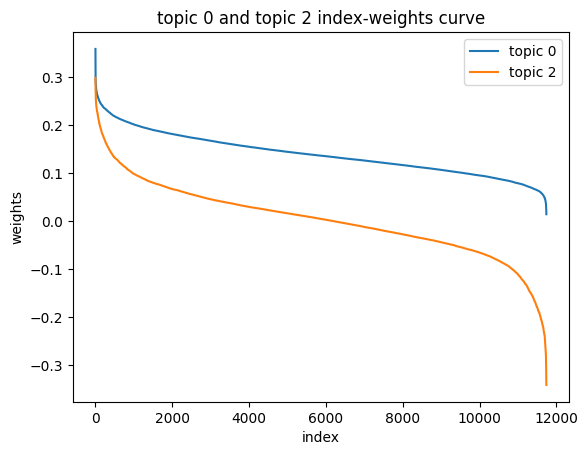

In [19]:
# draw topic 0 and topic 2 index-weights curve
idxs = list(range(len(pids_topic0)))
plt.plot(idxs, topic0_weights, label='topic 0')
plt.plot(idxs, topic2_weights, label='topic 2')
plt.xlabel('index')
plt.ylabel('weights')
plt.title('topic 0 and topic 2 index-weights curve')
plt.legend()
plt.show()

In [33]:
for idx, weight in enumerate(topic2_weights[:150]):
    print(idx, weight)
# topic 2 weight cutoff: 0.2 (corrsponding to index 111)

0 0.298321216660817
1 0.28134892310207466
2 0.27828584342816337
3 0.27154663848402977
4 0.27111182769681497
5 0.2701265773412901
6 0.26828821289317956
7 0.26641404339809116
8 0.260572057283251
9 0.2595479688706181
10 0.2530203168079133
11 0.25104913306421667
12 0.2507612464177009
13 0.24912414449041567
14 0.24711039458691375
15 0.24617450878828714
16 0.2451044553093402
17 0.2448198879073372
18 0.2438837881008737
19 0.2434908962848296
20 0.24299043446850185
21 0.24119121378095582
22 0.24082656773992606
23 0.23917286910836397
24 0.2390762191296724
25 0.2388531329560803
26 0.23837019544315877
27 0.2367503402228604
28 0.23664778913604062
29 0.2363873031213827
30 0.23595103909952092
31 0.23592019931059086
32 0.23494596049474098
33 0.23478507151153283
34 0.2340116328205221
35 0.23249959433980028
36 0.23247833785599045
37 0.2306743246800727
38 0.22889324019708368
39 0.22857958439738058
40 0.22822296821655744
41 0.22787831459597913
42 0.22779419927843314
43 0.2277088172842732
44 0.227700203707

In [28]:
for idx, weight in enumerate(topic0_weights[:150]):
    print(idx, weight)
# topic 0 weight cutoff: 0.25 (corrsponding to index 100)

0 0.35848259447767666
1 0.317945775369597
2 0.3070717797563549
3 0.3005370792541847
4 0.29439288214734827
5 0.2905939219677133
6 0.2901428914416215
7 0.2879469025207294
8 0.28598580389135236
9 0.284774318157509
10 0.2842655714305731
11 0.2836852777389836
12 0.2829644259921267
13 0.28265132940264587
14 0.27925699413827393
15 0.2787363264931148
16 0.2777361433828822
17 0.2751973887917311
18 0.274866278812985
19 0.2748058631806459
20 0.2742754016499829
21 0.2741375540686109
22 0.27370253382491905
23 0.2727335369815286
24 0.27152624269833364
25 0.2706410861036366
26 0.27057185260791583
27 0.270443779566165
28 0.270160189389634
29 0.2696433958589132
30 0.2678531129425475
31 0.2675227244706797
32 0.2672634538700019
33 0.26709032361796986
34 0.2667350067223886
35 0.2663902154481214
36 0.2658727330864813
37 0.2654090983218255
38 0.26533928218507324
39 0.2647474917970733
40 0.2644610206197719
41 0.26441121479217233
42 0.26433759244947197
43 0.26408202969050526
44 0.26387512447869366
45 0.263817

In [34]:
pids_topic0_top100 = pids_topic0[:100+1]
pids_topic2_top111 = pids_topic2[:111+1]

In [36]:
set(pids_topic0_top100) & set(pids_topic2_top111)

{'33486564',
 '33737894',
 '33803475',
 '33920904',
 '34408638',
 '34571039',
 '34577633',
 '35633158',
 '36180640',
 '37660309'}

In [44]:
# save the top 100 topic 0 abstracts
for pid in pids_topic0_top100:
    with open('topic0_abstracts/' + pid + '.txt', 'w') as f:
        f.write(pid_abstract_final[pid])

# create a merged abstract txt file
with open('topic0_abstracts.txt', 'w') as f:
    for pid in pids_topic0_top100:
        title = pid_title[pid]
        weight = topic0_weights[pids_topic0_top100.index(pid)]
        f.write('Weight: ' + str(weight) + '\n')
        f.write('PubMed ID: ' + pid + '\n')
        f.write('Title: ' + title + '\n')
        f.write(pid_abstract_final[pid] + '\n')
        f.write('=' * 50 + '\n')

In [45]:
# save the top 111 topic 2 abstracts
for pid in pids_topic2_top111:
    with open('topic2_abstracts/' + pid + '.txt', 'w') as f:
        f.write(pid_abstract_final[pid])

# create a merged abstract txt file
with open('topic2_abstracts.txt', 'w') as f:
    for pid in pids_topic2_top111:
        title = pid_title[pid]
        weight = topic2_weights[pids_topic2_top111.index(pid)]
        f.write('Weight: ' + str(weight) + '\n')
        f.write('PubMed ID: ' + pid + '\n')
        f.write('Title: ' + title + '\n')
        f.write(pid_abstract_final[pid] + '\n')
        f.write('=' * 50 + '\n')

In [9]:
import xlwings as xw
import os
import re

In [5]:
app = xw.App(visible=True, add_book=False)

In [6]:
wb = app.books.open('手动筛选.xlsx')

In [7]:
ws = wb.sheets[0]

In [8]:
topic2_files = os.listdir('topic2_abstracts')
topic0_files = os.listdir('topic0_abstracts')

pid_topic02 = {}
for file in topic2_files:
    pid = file.split('.')[0]
    with open('topic2_abstracts/' + file, 'r') as f:
        abstract = f.read()
    pid_topic02[pid] = abstract

for file in topic0_files:
    pid = file.split('.')[0]
    with open('topic0_abstracts/' + file, 'r') as f:
        abstract = f.read()
    pid_topic02[pid] = abstract

with open('pid_title.json', 'r') as f:
    pid_title = json.load(f)

In [12]:
# write pid, title and abstract to excel
for idx, pid in enumerate(pid_topic02):
    ws.range('A' + str(idx + 2)).value = pid
    
    title = pid_title[pid]
    abstract = pid_topic02[pid]
    ws.range('B' + str(idx + 2)).value = title
    for kw in key_words:
        result = re.search(kw, title, re.IGNORECASE)
        last_e = 0
        while result:
            start = result.start()+last_e
            end = result.end()+last_e
            last_e = end
            ws.range('B' + str(idx + 2)).characters[start:end].font.bold = True
            ws.range('B' + str(idx + 2)).characters[start:end].font.color = (0,0,255)
            result = re.search(kw, title[end:], re.IGNORECASE)

    ws.range('C' + str(idx + 2)).value = abstract
    for kw in key_words:
        result = re.search(kw, abstract, re.IGNORECASE)
        last_e = 0
        while result:
            start = result.start()+last_e
            end = result.end()+last_e
            last_e = end
            ws.range('C' + str(idx + 2)).characters[start:end].font.bold = True
            ws.range('C' + str(idx + 2)).characters[start:end].font.color = (0,0,255)
            result = re.search(kw, abstract[end:], re.IGNORECASE)
